# 感知器(Perceptron)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import random
import matplotlib.pyplot as plt

##### 設定我們有30個點，其中15個是圈圈，15個是叉叉

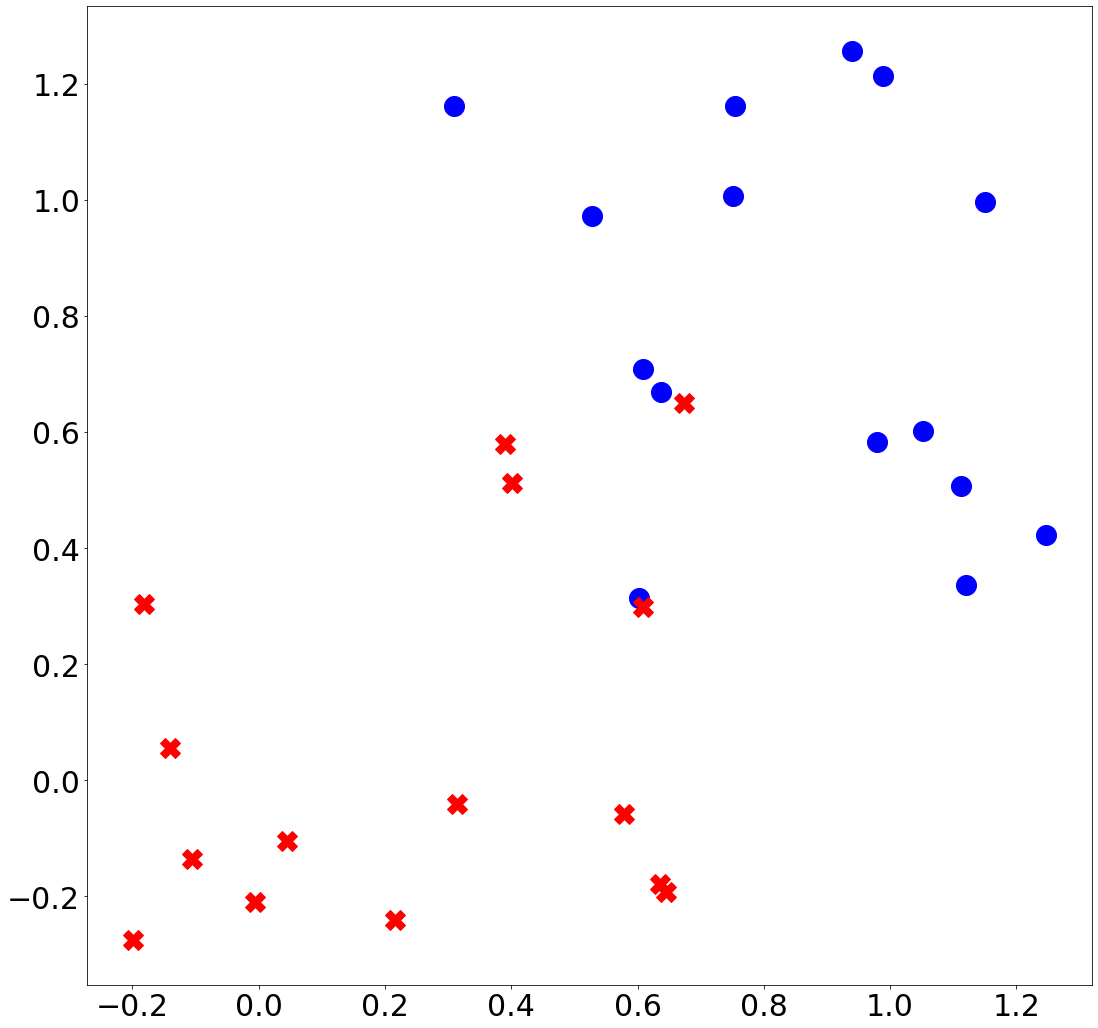

In [2]:
# 這裡我們建立一個30*2的矩陣x
# 30代表我們有30個點，2代表為2維空間(平面)
x=np.zeros((30,2))
# 這裡我們建立一個長度30的向量y
# 用來儲存我們的標記資料是圈圈(+1)還是叉叉(-1)
y=np.zeros(30)
# 因為有30筆資料，所以跑30個迴圈
for i in range(0,30): 
    # 標記y前半段0~14為圈圈(+1)，後半段15~29為叉叉(-1)
    # 也就是圈圈15個點，叉叉15個點
    f=0.3
    if(i<15):
        y[i]=1
        x[i,0],x[i,1]=random.random()+f,random.random()+f
    else:
        y[i]=-1
        x[i,0],x[i,1]=random.random()-f,random.random()-f
    # 這裡我們隨機給定我們資料的位置
    # random.random()就是從0到1隨機產生一個浮點數
    # 而f可以決定我們圈圈和叉叉兩組數據分的越開或是越近
    
# 設定我們輸出圖片的大小
plt.rcParams["figure.figsize"] = (18,18)
#畫出圈圈的點，bo：b代表藍色、o代表圈圈、marksize為大小
plt.plot(x[:15,0],x[:15,1],"bo",markersize=20)
#畫出叉叉的點，rX：r代表紅色、X代表叉叉、marksize為大小
plt.plot(x[15:,0],x[15:,1],"rX",markersize=20)
# 設定x和y軸座標的字體大小
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
#畫出來
plt.show()

##### 定義我們一些會需要用的方程式
##### (1) Sign function (2) 找錯誤點的方程式 (3) 計算錯誤點個數的方程式 (4) 繪圖方程式

In [3]:
# 這裡我們定義我們的sign function
def sign(w,x):
    # np.dot(w,x)=w0*x0+w1*x1+w2*x2
    # 所以當大於0，我們回傳一，反之則-1
    if(np.dot(w,x)>0):
        return 1
    else:
        return -1
# 這裡我們定義我們尋找分類錯誤點的方程式
def search_error(w,x):
    # 我們用while迴圈跑
    while True:
        # 這裡我們從0~29隨機挑一個數字
        # 也就是我們30個點隨機挑一個
        i=random.randint(0,29)
        # 這裡我們check他有沒有分類錯誤
        if(sign(w,x[:,i])!=y[i]):
            # 找到錯的之後，我們分別把這個點
            # 的位置和是否為圈圈或叉叉記下來
            err_x=x[:,i]
            err_y=y[i]
            # 然後結束我們的while迴圈
            break
        # 沒有分類錯誤，就繼續隨機挑直到找到錯為止
    # 最後回傳我們的錯誤點資訊
    return err_x,err_y
# 這裡我們定義計算錯誤點數的方程式
def compute_error(w,x):
    # 初始化
    err=0
    # 檢查全部的點
    for i in range(0,30):
        # 如果分類錯了，就+1個
        if(sign(w,x[:,i])!=y[i]):
            err+=1
    # 回傳錯誤個數
    return err
# 這裡我們定義畫圖方程式
def plot_diagram(w,x):
    plt.rcParams["figure.figsize"] = (18,18)
    plt.plot(x[1,:15],x[2,:15],"bo",markersize=20)
    plt.plot(x[1,15:],x[2,15:],"rX",markersize=20)
    # 這裡是畫出分割線的算法
    # 我們知道分割線滿足 w0*x0+w1*x1+w2*x2=0
    # 所以 x2=-(w1/w2)*x1-(w0/w2)*x0
    # 斜率 = -w1/w2、截距 = -w0/w2
    m=-w[1]/w[2]
    b=-w[0]/w[2]
    plt.plot([-0.3,1.3],[m*-0.3+b,m*1.3+b],"k-",linewidth=6)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    # xlim就是限制我們圖輸出的x座標
    # ylim就是限制我們圖輸出的y座標
    plt.xlim([-0.3,1.3])
    plt.ylim([-0.3,1.3])
    plt.show()

##### 執行我們感知器演算法

15
9


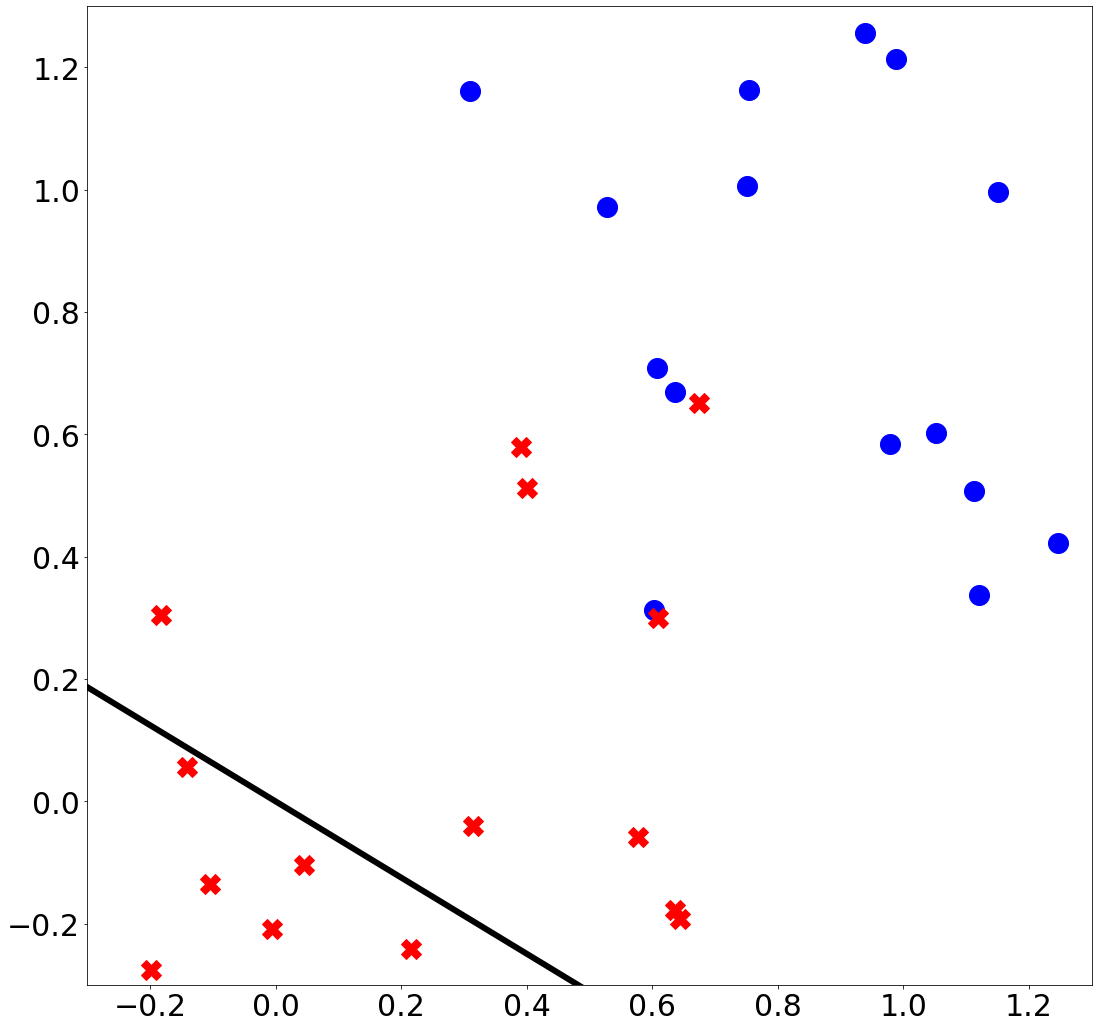

8


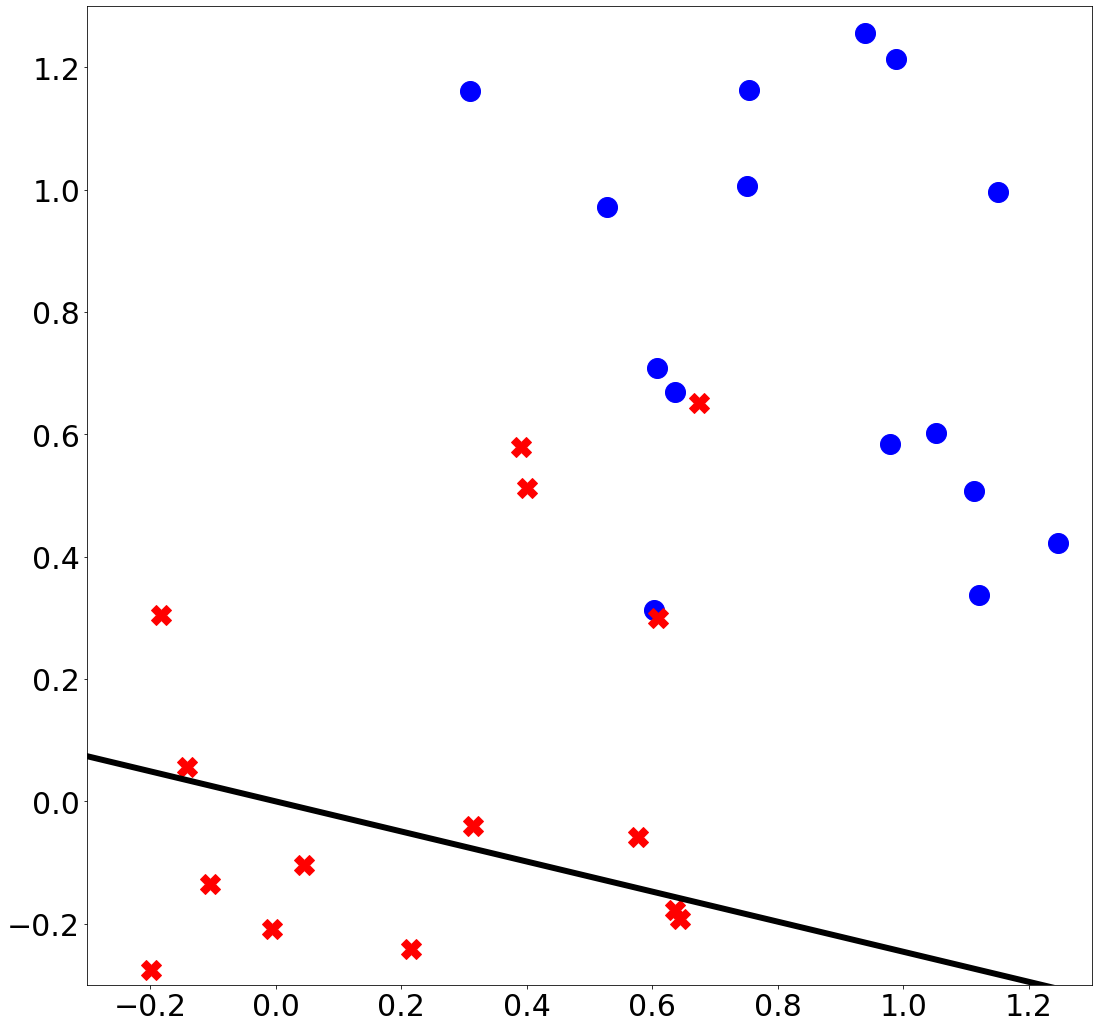

7


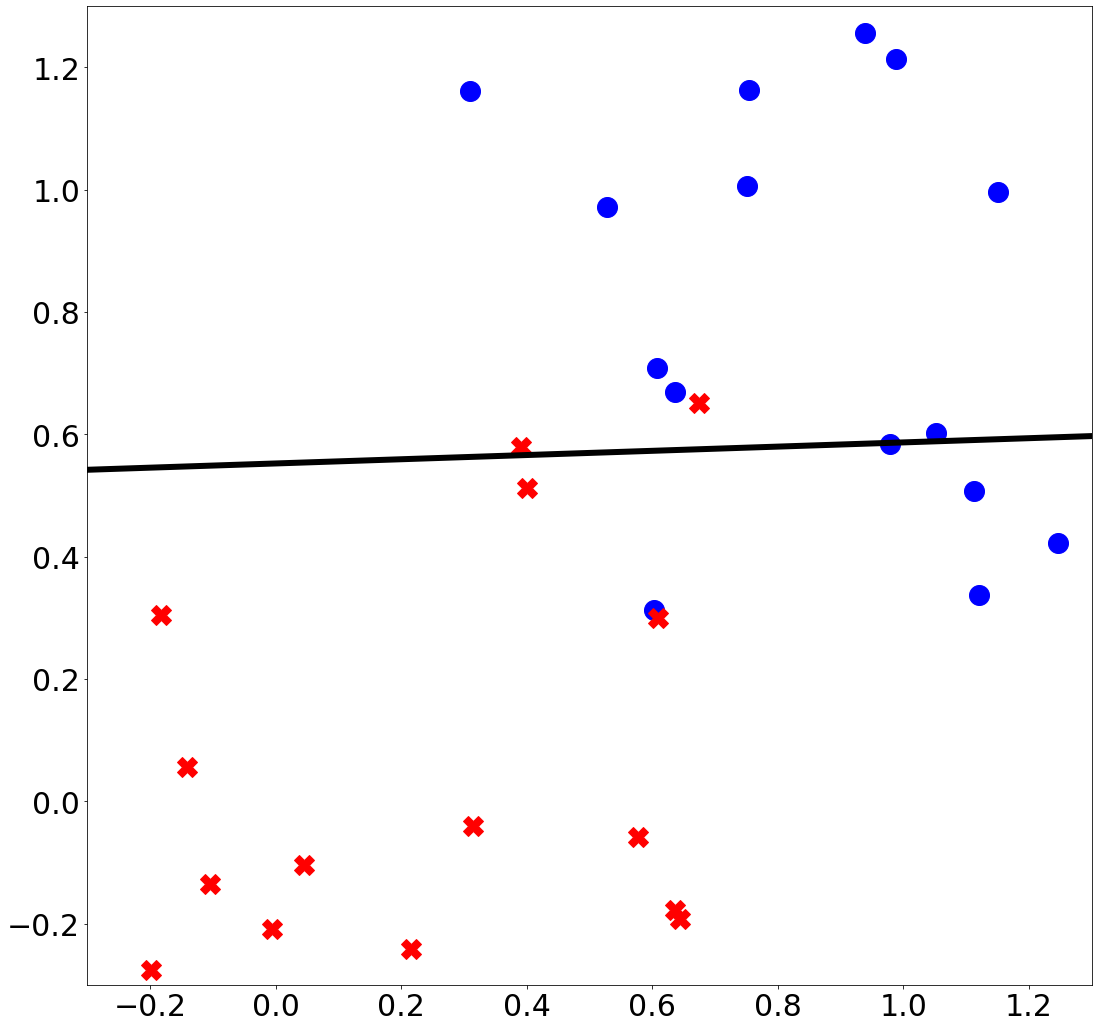

4


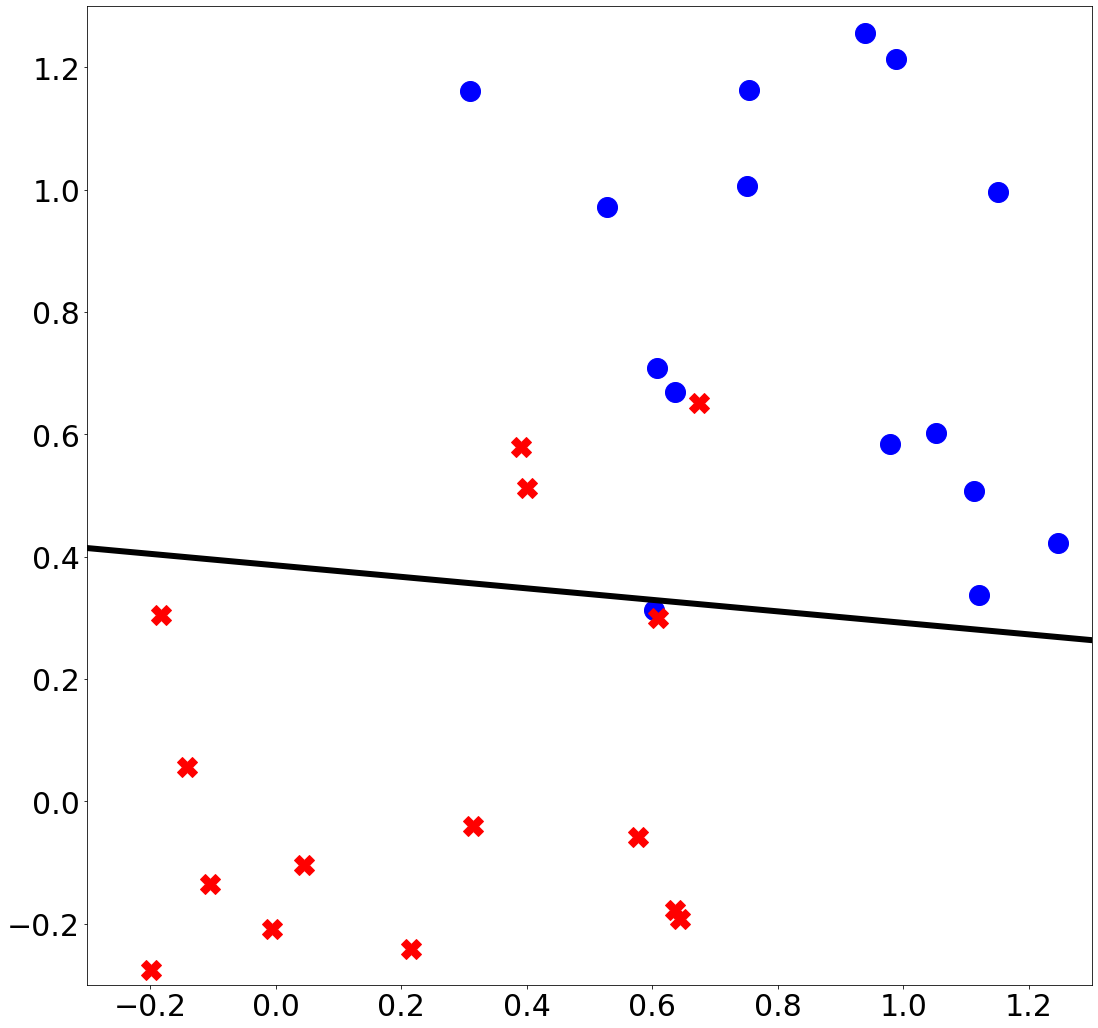

2


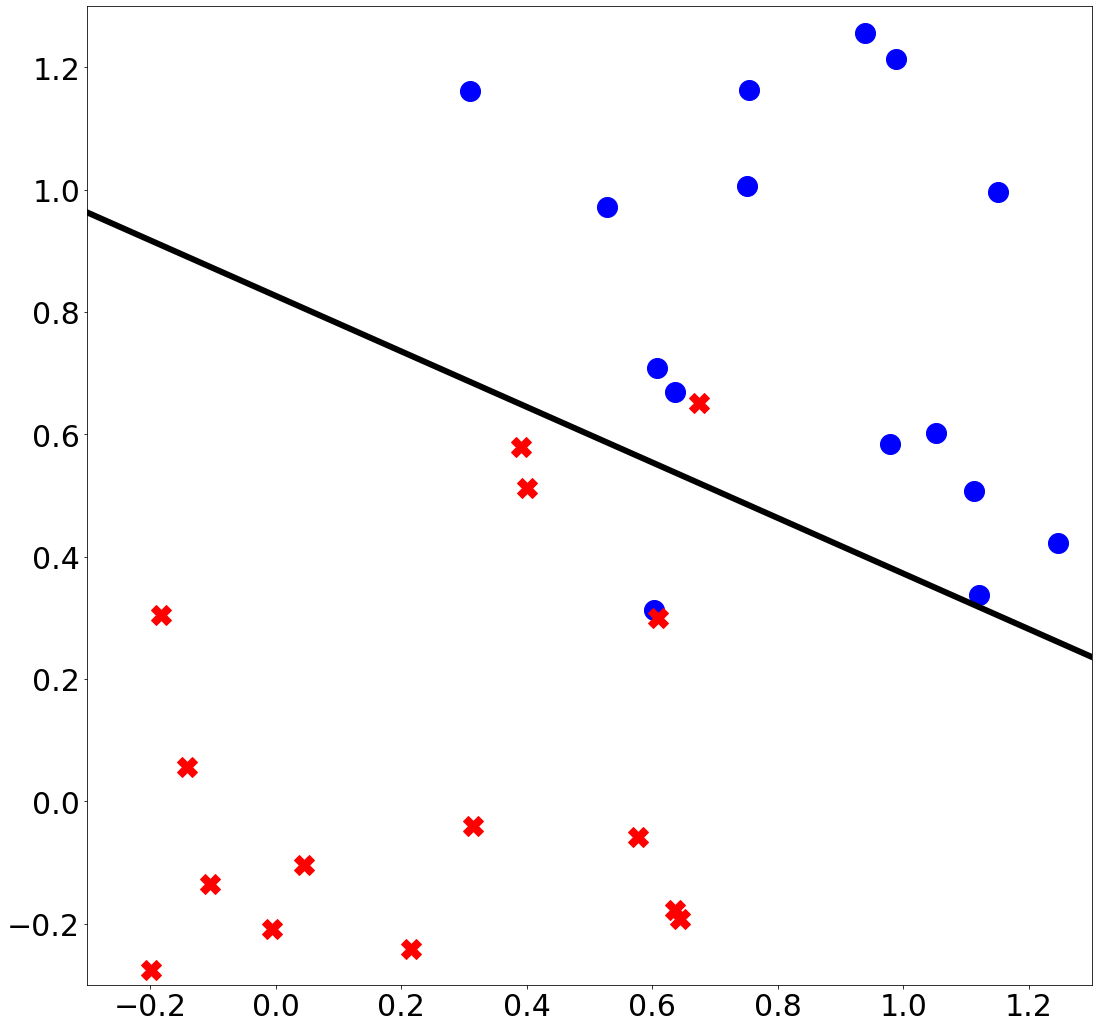

In [4]:
# 初始化權重w
w=np.zeros(3)
# 這裡我們在每一筆輸入資料前加一筆為1的資料
# ex:x=[0.2 0.3] --> xx=[1 0.2 0.3]
# 加1是為了之後乘上w0，他就會一直保持w0
ones=np.ones(30)
xx=np.vstack([ones,x[:,0],x[:,1]])
# 設定我們演算法要跑幾次
T=500
# 我們先計算初始狀況有積個分類錯誤
# 照理來說電腦一開始會把圈圈和叉叉全部
# 分在同一類，所以會有15個分類錯誤
error=compute_error(w,xx)
print(error)
# 開始迴圈
for t in range(0,T):
    # 這裡引入tmp_error用於比較上一次的error數量
    tmp_error=0
    # 隨機挑一個錯誤的點
    error_x,error_y=search_error(w,xx)
    # 更新我們的w
    w=w+error_y*error_x
    # 然後計算更新後的w，其錯誤的個數
    tmp_error=compute_error(w,xx)
    # 如果更新後錯誤率下降
    # 我們就更新我們的錯誤率
    # 並把它畫出來
    if(tmp_error<error):
        error=tmp_error
        print(error)
        plot_diagram(w,xx)
        # 如果沒有錯誤點就停止迴圈
        if(error==0):
            break